In [83]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as pyplot
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

combining datasets by year

In [87]:
data1 = ['employment_rate','hours_worked','gov_debt','perm_immigrants','exchange_rates','gdp','inflation','young_population','old_age_dependency','m3','m1','long_term_interest_rates','tax_revenue','spending_on_rnd']
data2 = ['65age','employment_population','gni','net_trade_in_goods','population_growth','foreign_investment','gdp_growth','population']
bigdf = pd.read_csv('data\employment_rate.csv')
bigdf = bigdf[bigdf['LOCATION']=='JPN']
bigdf = bigdf[['TIME', 'Value']]
bigdf = bigdf.rename(columns={'Value': data1[0]})
bigdf = bigdf.set_index('TIME')
for x in range(1,len(data1)):
    csv = "data\\" + data1[x] + ".csv"
    df = pd.read_csv(csv)
    df = df[df['LOCATION']=='JPN']
    df = df[['TIME', 'Value']]
    df = df.rename(columns={'Value': data1[x]})
    df = df.set_index('TIME')
    bigdf = bigdf.join(df)

bigdf.reset_index(inplace=True)
bigdf = bigdf.astype({'TIME':'int64'})
bigdf

,TIME,employment_rate,hours_worked,gov_debt,perm_immigrants,exchange_rates,gdp,inflation,young_population,old_age_dependency,m3,m1,long_term_interest_rates,tax_revenue,spending_on_rnd
0,1968,68.34715,NaN,NaN,NaN,360.000000,NaN,NaN,24.196888,11.4,NaN,2.529122,NaN,17.425,NaN
1,1969,68.05464,NaN,NaN,NaN,360.000000,NaN,NaN,24.074336,11.5,NaN,3.018481,NaN,17.739,NaN
2,1970,68.02609,2243.000000,NaN,NaN,360.000000,3348.832992,NaN,24.031661,11.7,NaN,3.643523,NaN,18.609,NaN
3,1971,67.81510,2239.000000,NaN,NaN,350.677694,3647.705468,6.300000,24.099774,11.9,NaN,4.467495,NaN,18.889,NaN
4,1972,67.32407,2228.000000,NaN,NaN,303.172500,4069.992935,4.908333,24.195583,12.1,NaN,5.464527,NaN,19.512,NaN
5,1973,67.76276,2201.000000,NaN,NaN,271.701667,4532.013020,11.566670,24.328706,12.4,NaN,6.985854,NaN,21.158,NaN
6,1974,66.85671,2137.000000,NaN,NaN,292.082500,4812.870739,23.175000,24.401433,12.7,NaN,7.918545,NaN,21.691,NaN
7,1975,66.05473,2112.000000,NaN,NaN,296.787500,5355.131154,11.908330,24.327475,12.7,NaN,8.877714,NaN,19.782,NaN
8,1976,66.08424,2128.000000,NaN,NaN,296.552500,5809.310070,9.366667,24.310258,13.4,NaN,10.075510,NaN,20.575,NaN
9,1977,66.41894,2129.000000,NaN,NaN,268.510000,6378.376732,8.175000,24.220818,13.8,NaN,10.774990,NaN,21.107,NaN


In [88]:
for x in range(0,len(data2)):
    csv = "data\\" + data2[x] + ".csv"
    newdf = pd.read_csv(csv)
    newdf = newdf[newdf['Country Name'] == 'Japan']
    newdf = newdf.loc[:, 'Indicator Code':].drop(['Indicator Code'],axis=1)
    newdf = newdf.transpose()
    newdf.index.name='TIME'
    newdf.reset_index(inplace=True)
    newdf = newdf.astype({'TIME':'int64'})
    newdf[data2[x]] = newdf.iloc[:,1]
    newdf = newdf.drop([newdf.columns[1]],axis = 1)
    bigdf = bigdf.merge(newdf, on=['TIME'], how='left')
    #print(csv)
bigdf

,TIME,employment_rate,hours_worked,gov_debt,perm_immigrants,exchange_rates,gdp,inflation,young_population,old_age_dependency,...,tax_revenue,spending_on_rnd,65age,employment_population,gni,net_trade_in_goods,population_growth,foreign_investment,gdp_growth,population
0,1968,68.34715,NaN,NaN,NaN,360.000000,NaN,NaN,24.196888,11.4,...,17.425,NaN,6.938409,NaN,1.456040e+11,NaN,1.126997,NaN,12.882468,NaN
1,1969,68.05464,NaN,NaN,NaN,360.000000,NaN,NaN,24.074336,11.5,...,17.739,NaN,7.077093,NaN,1.710760e+11,NaN,1.188815,NaN,12.477895,NaN
2,1970,68.02609,2243.000000,NaN,NaN,360.000000,3348.832992,NaN,24.031661,11.7,...,18.609,NaN,7.197698,NaN,2.151450e+11,NaN,1.151640,0.044213,2.454958,0.044213
3,1971,67.81510,2239.000000,NaN,NaN,350.677694,3647.705468,6.300000,24.099774,11.9,...,18.889,NaN,7.319658,NaN,2.432060e+11,NaN,2.194254,0.087445,4.698992,0.087445
4,1972,67.32407,2228.000000,NaN,NaN,303.172500,4069.992935,4.908333,24.195583,12.1,...,19.512,NaN,7.481323,NaN,3.225360e+11,NaN,1.400779,0.053139,8.413547,0.053139
5,1973,67.76276,2201.000000,NaN,NaN,271.701667,4532.013020,11.566670,24.328706,12.4,...,21.158,NaN,7.669650,NaN,4.382550e+11,NaN,1.407189,-0.009720,8.032600,-0.009720
6,1974,66.85671,2137.000000,NaN,NaN,292.082500,4812.870739,23.175000,24.401433,12.7,...,21.691,NaN,7.860290,NaN,4.854900e+11,NaN,1.329582,0.042116,-1.225240,0.042116
7,1975,66.05473,2112.000000,NaN,NaN,296.787500,5355.131154,11.908330,24.327475,12.7,...,19.782,NaN,8.065661,NaN,5.283300e+11,NaN,1.272708,0.043333,3.091576,0.043333
8,1976,66.08424,2128.000000,NaN,NaN,296.552500,5809.310070,9.366667,24.310258,13.4,...,20.575,NaN,8.284509,NaN,5.938640e+11,NaN,1.071560,0.019278,3.974984,0.019278
9,1977,66.41894,2129.000000,NaN,NaN,268.510000,6378.376732,8.175000,24.220818,13.8,...,21.107,NaN,8.526136,NaN,7.312150e+11,NaN,0.968033,0.002911,4.390338,0.002911


In [89]:
#bigdf.to_csv('not_used_df.csv')

lots of null values but will test anyways for now

In [4]:
predictors = bigdf.columns
predictors = predictors.drop(['TIME','exchange_rates'])
bigdf.dropna(inplace=True)
X = bigdf[predictors]
y = bigdf['exchange_rates']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 589, shuffle = True)

will start with a random forest regressor, testing different values for the hyper parameters

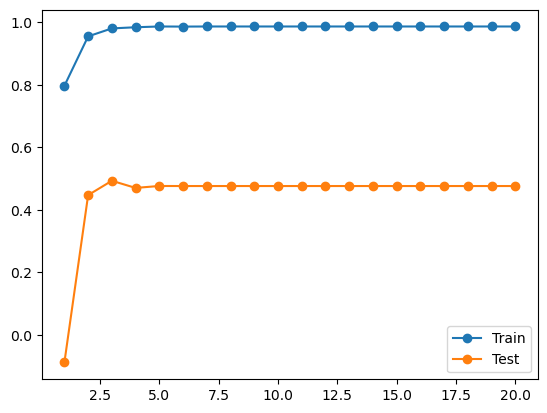

In [5]:
values = [i for i in range(1,21)]
train_scores=[]
test_scores=[]
for i in values:
    test = RandomForestRegressor(max_depth = i, random_state = 84, n_estimators = 50)
    test.fit(X_train, y_train)
    train_scores.append(test.score(X_train, y_train))
    test_scores.append(test.score(X_test,y_test))

# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

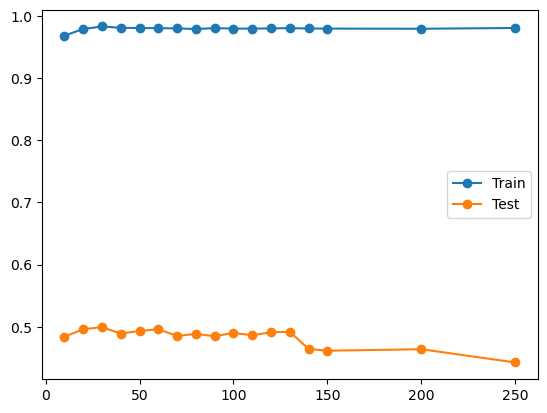

In [6]:
values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 200, 250]
train_scores=[]
test_scores=[]
for i in values:
    test = RandomForestRegressor(max_depth = 3, random_state = 84, n_estimators = i)
    test.fit(X_train, y_train)
    train_scores.append(test.score(X_train, y_train))
    test_scores.append(test.score(X_test,y_test))

# plot of train and test scores vs n estimators
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

big red flag for overfitting!

In [7]:
regr = RandomForestRegressor(max_depth = 3, random_state = 84, n_estimators = 200)
regr.fit(X_train, y_train)
rf_predictions = regr.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, rf_predictions)


51.36249660863371

In [8]:
print(regr.score(X_train, y_train))
print(regr.score(X_test, y_test))

0.9794830669578186
0.4638041687664861


another warning!

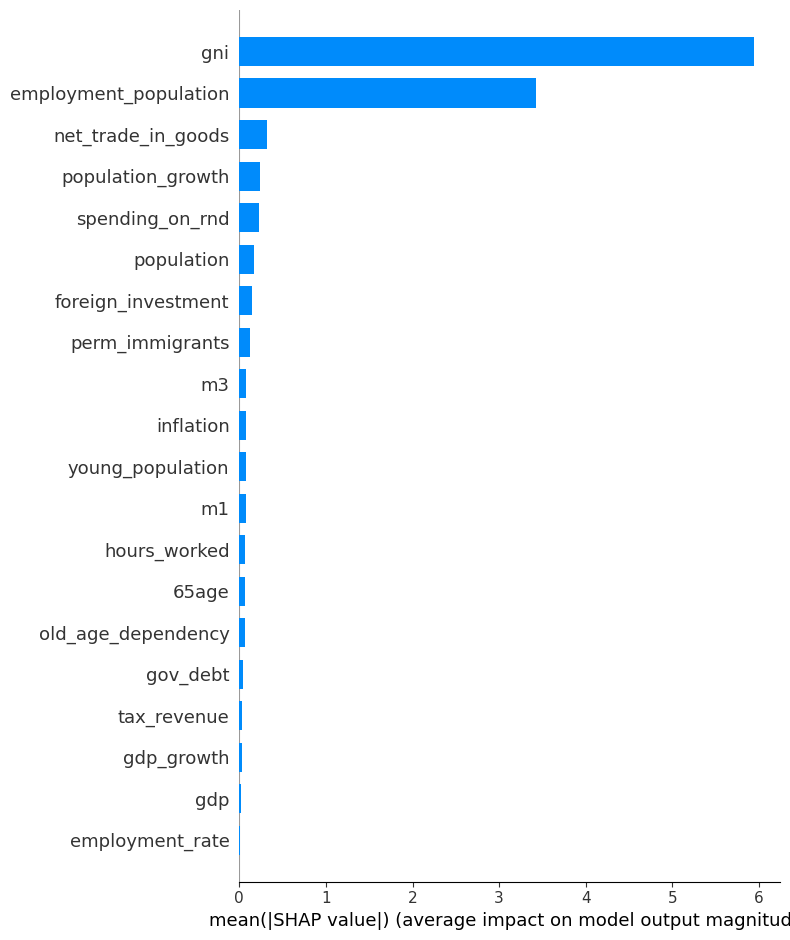

In [9]:
import shap
# Calculate SHAP values
explainer = shap.TreeExplainer(regr)
shap_values = explainer.shap_values(X_test)

# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test, plot_type="bar")

examining our predictors and visualizing how much influence they have

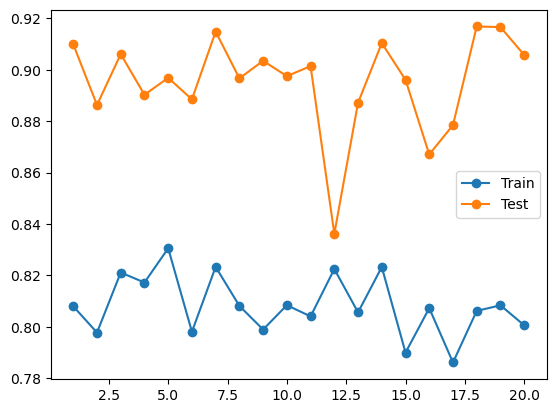

In [10]:
import xgboost as xg
values = [i for i in range(1,21)]
train_scores=[]
test_scores=[]
for i in values:
    test = xg.XGBRegressor(n_estimators = 50, max_depth = i, random_state = 84, booster = 'gblinear', learning_rate = 1)
    test.fit(X_train, y_train)
    train_scores.append(test.score(X_train, y_train))
    test_scores.append(test.score(X_test,y_test))

# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

initially tried gblinear because I viewed this task as a simple linear regression task with need to feature select

going to try an xgboost tree to see if we can get better results, will test different hyper parameters again

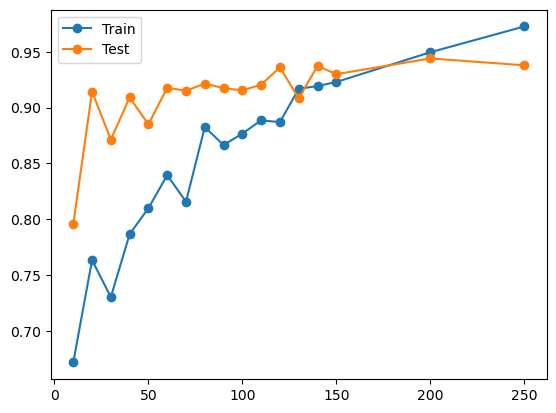

In [11]:
values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 200, 250]
train_scores=[]
test_scores=[]
for i in values:
    test = xg.XGBRegressor(n_estimators = i, max_depth = 3, random_state = 84, booster = 'gblinear', learning_rate = 1)
    test.fit(X_train, y_train)
    train_scores.append(test.score(X_train, y_train))
    test_scores.append(test.score(X_test,y_test))

# plot of train and test scores vs n estimators
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

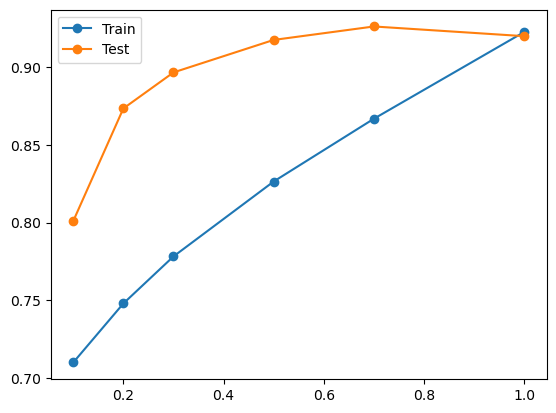

In [12]:
values = [0.1, 0.2, 0.3, 0.5, 0.7, 1.0]
train_scores=[]
test_scores=[]
for i in values:
    test = xg.XGBRegressor(n_estimators = 125, max_depth = 2, random_state = 84, booster = 'gblinear', learning_rate = i)
    test.fit(X_train, y_train)
    train_scores.append(test.score(X_train, y_train))
    test_scores.append(test.score(X_test,y_test))

# plot of train and test scores vs learning rate
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [13]:
xgb = xg.XGBRegressor(n_estimators = 125, max_depth = 3, random_state = 84, booster = 'gblinear', learning_rate = 1)


xgb.fit(X_train, y_train)
xgb_predictions = xgb.predict(X_test)
mean_squared_error(y_test, xgb_predictions)

6.791989951407427

In [14]:
print(xgb.score(X_train, y_train))
print(xgb.score(X_test, y_test))

0.9086924332023107
0.9290954112788901


now we also have an extremely high test rsquared, another sign of overfitting

In [20]:
X_train, X_test, y_train, y_test = train_test_split(bigdf, bigdf, test_size = .15, shuffle = False)

In [21]:
train = X_train
test = X_test

In [22]:
train = train.set_index('TIME')
test = test.set_index('TIME')

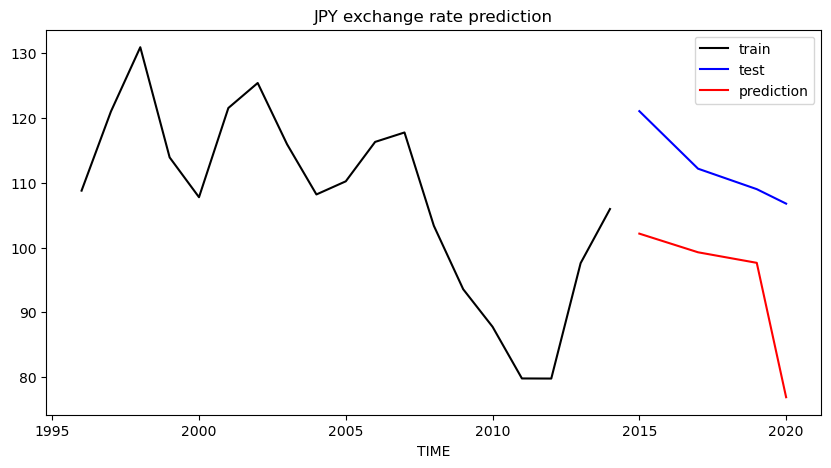

In [23]:
import matplotlib.pyplot as plt
X_train = train.drop('exchange_rates', axis =1)
y_train = train['exchange_rates']

X_test = test.drop('exchange_rates', axis =1)
y_test = test['exchange_rates']

xgb.fit(X_train, y_train)
test['exchange_prediction'] = xgb.predict(X_test)

train['exchange_rates'].plot(style='k', figsize=(10,5), label = 'train')
test['exchange_rates'].plot(style='b', figsize=(10,5), label = 'test')
test['exchange_prediction'].plot(style='r', figsize=(10,5), label = 'prediction')
plt.title('JPY exchange rate prediction')
plt.legend()

We can see that our prediction is pretty far off...

<Figure size 1800x1200 with 0 Axes>

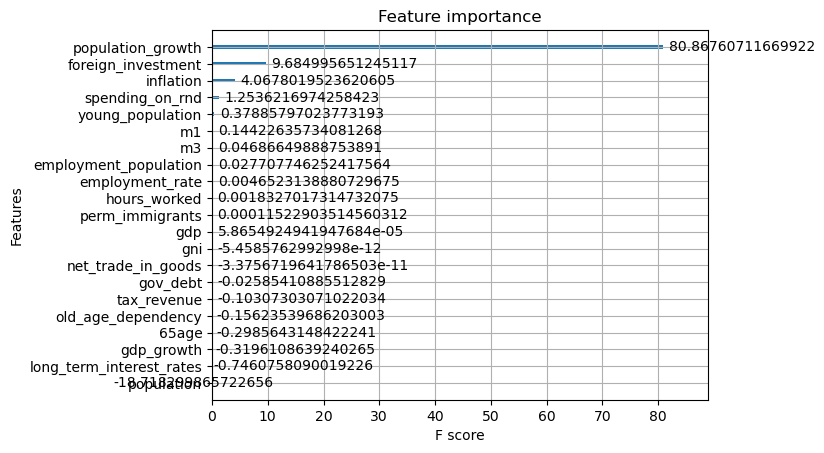

In [28]:
from xgboost import plot_importance
plt.figure(figsize=(18,12))
plot_importance(xgb)
pyplot.show()

<Axes: >

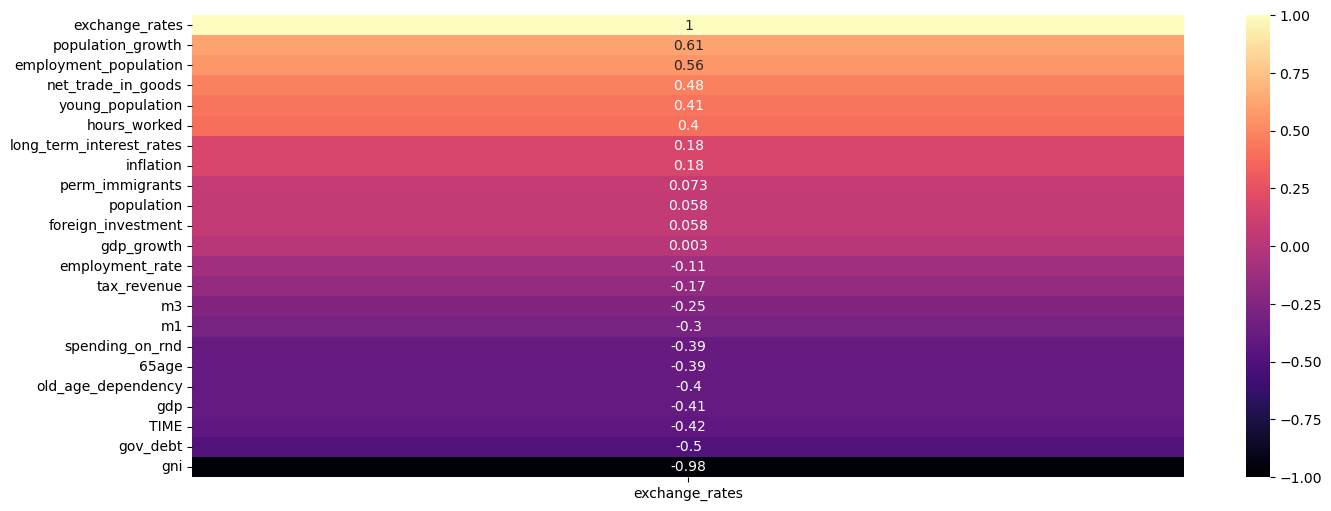

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
sns.heatmap(bigdf.corr()[['exchange_rates']].sort_values(by='exchange_rates',ascending=False),vmin=-1,vmax=1,annot=True,cmap='magma')

I think heatmaps are more aesthetically pleasing and a bit more digestable when visualizing the coorelation between the predictors and the target

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 589, shuffle = True)

In [31]:
from sklearn.linear_model import LinearRegression

trying a linear regression to see if we get different results, will expand on this regression more

In [32]:
reg = LinearRegression()
reg.fit(X_train, y_train)
reg_pred = reg.predict(X_test)

In [33]:
mean_squared_error(y_test, reg_pred)

61.62406592298013

In [34]:
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

0.9999999976476102
0.35667910570361694


we get the idea of the pattern...

In [35]:
import statsmodels.api as sm
x = sm.add_constant(X)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         exchange_rates   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     50.95
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           0.000829
Time:                        01:23:47   Log-Likelihood:                -29.329
No. Observations:                  23   AIC:                             96.66
Df Residuals:                       4   BIC:                             118.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [36]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error
y_pred = lasso.predict(X_test)
mean_squared_error(y_test, y_pred)

14.181813881150617

trying Lasso to reduce the overfitting, hopefully will remove or reduce the effects of some of our predictors

In [37]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.9899468336475619
0.8519497691020667


uh-oh same results

In [38]:
coef = lasso.coef_
print(f"Coefficients: {coef}")
from pandas import DataFrame
DataFrame(data = lasso.coef_, index=X_train.columns.tolist()).T

Coefficients: [ 0.00000000e+00  5.83358182e-02 -0.00000000e+00  4.67132716e-05
  9.18106244e-05 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  5.26788969e-01 -1.68685793e-01 -0.00000000e+00  8.59944683e-01
 -0.00000000e+00 -0.00000000e+00  5.40408447e-01 -1.93683938e-11
  1.88961571e-11 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00]


,employment_rate,hours_worked,gov_debt,perm_immigrants,gdp,inflation,young_population,old_age_dependency,m3,m1,...,tax_revenue,spending_on_rnd,65age,employment_population,gni,net_trade_in_goods,population_growth,foreign_investment,gdp_growth,population
0,0.0,0.058336,-0.0,0.000047,0.000092,-0.0,-0.0,-0.0,0.526789,-0.168686,...,0.859945,-0.0,-0.0,0.540408,-1.936839e-11,1.889616e-11,-0.0,-0.0,0.0,-0.0


will try elastic net to combine the effects of Lasso and Ridge

In [39]:
from sklearn.model_selection import RandomizedSearchCV
import warnings
from numpy import linspace
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import ElasticNet
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'l1_ratio': linspace(0, 1, 10)
}

enet_model = ElasticNet()

random_search = RandomizedSearchCV(enet_model,
                                   param_distributions=param_grid,
                                   n_iter=30,
                                   scoring='neg_mean_squared_error',
                                   cv=5,
                                   verbose=1)
random_search.fit(X_train, y_train)

# Best parameters from Randomized Search
print("Best parameters found (Randomized Search): ", random_search.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters found (Randomized Search):  {'l1_ratio': 0.4444444444444444, 'alpha': 1}


In [40]:
# Here, we're setting l1_ratio to 0.5 as an example
elastic_net = ElasticNet(alpha=0.1, l1_ratio=1)
elastic_net.fit(X_train, y_train)

y_pred_enet = elastic_net.predict(X_test)

mse_enet = mean_squared_error(y_test, y_pred_enet)
print(f"Elastic Net Mean Squared Error: {mse_enet:.2f}")

Elastic Net Mean Squared Error: 14.18


In [41]:
print(elastic_net.score(X_train, y_train))
print(elastic_net.score(X_test, y_test))

0.9899468336475619
0.8519497691020667


same thing, while Lasso & elastic net produced mildly better results, if we do some feature engineering we might be able to produce better results

In [42]:
coef_enet = elastic_net.coef_
print(f"Elastic Net Coefficients: {coef_enet}")

Elastic Net Coefficients: [ 0.00000000e+00  5.83358182e-02 -0.00000000e+00  4.67132716e-05
  9.18106244e-05 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  5.26788969e-01 -1.68685793e-01 -0.00000000e+00  8.59944683e-01
 -0.00000000e+00 -0.00000000e+00  5.40408447e-01 -1.93683938e-11
  1.88961571e-11 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00]


enough is enough, we will reexamine our data and see what predictors we can remove and data we can save (as we lost data when removing it for null values)

In [43]:
data1 = ['employment_rate','hours_worked','gov_debt','perm_immigrants','exchange_rates','gdp','inflation','young_population','old_age_dependency','m3','m1','long_term_interest_rates','tax_revenue','spending_on_rnd']
data2 = ['65age','employment_population','gni','net_trade_in_goods','population_growth','foreign_investment','gdp_growth','population']
bigdf = pd.read_csv('data\employment_rate.csv')
bigdf = bigdf[bigdf['LOCATION']=='JPN']
bigdf = bigdf[['TIME', 'Value']]
bigdf = bigdf.rename(columns={'Value': data1[0]})
bigdf = bigdf.set_index('TIME')
for x in range(1,len(data1)):
    csv = "data\\" + data1[x] + ".csv"
    df = pd.read_csv(csv)
    df = df[df['LOCATION']=='JPN']
    df = df[['TIME', 'Value']]
    df = df.rename(columns={'Value': data1[x]})
    df = df.set_index('TIME')
    bigdf = bigdf.join(df)

bigdf.reset_index(inplace=True)
bigdf = bigdf.astype({'TIME':'int64'})
bigdf

,TIME,employment_rate,hours_worked,gov_debt,perm_immigrants,exchange_rates,gdp,inflation,young_population,old_age_dependency,m3,m1,long_term_interest_rates,tax_revenue,spending_on_rnd
0,1968,68.34715,NaN,NaN,NaN,360.000000,NaN,NaN,24.196888,11.4,NaN,2.529122,NaN,17.425,NaN
1,1969,68.05464,NaN,NaN,NaN,360.000000,NaN,NaN,24.074336,11.5,NaN,3.018481,NaN,17.739,NaN
2,1970,68.02609,2243.000000,NaN,NaN,360.000000,3348.832992,NaN,24.031661,11.7,NaN,3.643523,NaN,18.609,NaN
3,1971,67.81510,2239.000000,NaN,NaN,350.677694,3647.705468,6.300000,24.099774,11.9,NaN,4.467495,NaN,18.889,NaN
4,1972,67.32407,2228.000000,NaN,NaN,303.172500,4069.992935,4.908333,24.195583,12.1,NaN,5.464527,NaN,19.512,NaN
5,1973,67.76276,2201.000000,NaN,NaN,271.701667,4532.013020,11.566670,24.328706,12.4,NaN,6.985854,NaN,21.158,NaN
6,1974,66.85671,2137.000000,NaN,NaN,292.082500,4812.870739,23.175000,24.401433,12.7,NaN,7.918545,NaN,21.691,NaN
7,1975,66.05473,2112.000000,NaN,NaN,296.787500,5355.131154,11.908330,24.327475,12.7,NaN,8.877714,NaN,19.782,NaN
8,1976,66.08424,2128.000000,NaN,NaN,296.552500,5809.310070,9.366667,24.310258,13.4,NaN,10.075510,NaN,20.575,NaN
9,1977,66.41894,2129.000000,NaN,NaN,268.510000,6378.376732,8.175000,24.220818,13.8,NaN,10.774990,NaN,21.107,NaN


In [44]:
for x in range(0,len(data2)):
    csv = "data\\" + data2[x] + ".csv"
    newdf = pd.read_csv(csv)
    newdf = newdf[newdf['Country Name'] == 'Japan']
    newdf = newdf.loc[:, 'Indicator Code':].drop(['Indicator Code'],axis=1)
    newdf = newdf.transpose()
    newdf.index.name='TIME'
    newdf.reset_index(inplace=True)
    newdf = newdf.astype({'TIME':'int64'})
    newdf[data2[x]] = newdf.iloc[:,1]
    newdf = newdf.drop([newdf.columns[1]],axis = 1)
    bigdf = bigdf.merge(newdf, on=['TIME'], how='left')
    #print(csv)
bigdf

,TIME,employment_rate,hours_worked,gov_debt,perm_immigrants,exchange_rates,gdp,inflation,young_population,old_age_dependency,...,tax_revenue,spending_on_rnd,65age,employment_population,gni,net_trade_in_goods,population_growth,foreign_investment,gdp_growth,population
0,1968,68.34715,NaN,NaN,NaN,360.000000,NaN,NaN,24.196888,11.4,...,17.425,NaN,6.938409,NaN,1.456040e+11,NaN,1.126997,NaN,12.882468,NaN
1,1969,68.05464,NaN,NaN,NaN,360.000000,NaN,NaN,24.074336,11.5,...,17.739,NaN,7.077093,NaN,1.710760e+11,NaN,1.188815,NaN,12.477895,NaN
2,1970,68.02609,2243.000000,NaN,NaN,360.000000,3348.832992,NaN,24.031661,11.7,...,18.609,NaN,7.197698,NaN,2.151450e+11,NaN,1.151640,0.044213,2.454958,0.044213
3,1971,67.81510,2239.000000,NaN,NaN,350.677694,3647.705468,6.300000,24.099774,11.9,...,18.889,NaN,7.319658,NaN,2.432060e+11,NaN,2.194254,0.087445,4.698992,0.087445
4,1972,67.32407,2228.000000,NaN,NaN,303.172500,4069.992935,4.908333,24.195583,12.1,...,19.512,NaN,7.481323,NaN,3.225360e+11,NaN,1.400779,0.053139,8.413547,0.053139
5,1973,67.76276,2201.000000,NaN,NaN,271.701667,4532.013020,11.566670,24.328706,12.4,...,21.158,NaN,7.669650,NaN,4.382550e+11,NaN,1.407189,-0.009720,8.032600,-0.009720
6,1974,66.85671,2137.000000,NaN,NaN,292.082500,4812.870739,23.175000,24.401433,12.7,...,21.691,NaN,7.860290,NaN,4.854900e+11,NaN,1.329582,0.042116,-1.225240,0.042116
7,1975,66.05473,2112.000000,NaN,NaN,296.787500,5355.131154,11.908330,24.327475,12.7,...,19.782,NaN,8.065661,NaN,5.283300e+11,NaN,1.272708,0.043333,3.091576,0.043333
8,1976,66.08424,2128.000000,NaN,NaN,296.552500,5809.310070,9.366667,24.310258,13.4,...,20.575,NaN,8.284509,NaN,5.938640e+11,NaN,1.071560,0.019278,3.974984,0.019278
9,1977,66.41894,2129.000000,NaN,NaN,268.510000,6378.376732,8.175000,24.220818,13.8,...,21.107,NaN,8.526136,NaN,7.312150e+11,NaN,0.968033,0.002911,4.390338,0.002911


In [45]:
bigdf.isna().sum()

TIME                         0
employment_rate              0
hours_worked                 2
gov_debt                    27
perm_immigrants             27
exchange_rates               0
gdp                          2
inflation                    3
young_population             0
old_age_dependency           2
m3                          12
m1                           0
long_term_interest_rates    22
tax_revenue                  2
spending_on_rnd             14
65age                        0
employment_population       23
gni                          0
net_trade_in_goods          28
population_growth            0
foreign_investment           2
gdp_growth                   0
population                   2
dtype: int64

looking to remove predictors that have too many null values

In [46]:
newdata1 = ['hours_worked','exchange_rates','gdp','young_population','old_age_dependency','m1']
newdata2 = ['65age','gni','population_growth']

also removed predictors that had low SHAP scores

In [47]:
bigdf = pd.read_csv('data\employment_rate.csv')
bigdf = bigdf[bigdf['LOCATION']=='JPN']
bigdf = bigdf[['TIME', 'Value']]
bigdf = bigdf.rename(columns={'Value': newdata1[0]})
bigdf = bigdf.set_index('TIME')
for x in range(1,len(newdata1)):
    csv = "data\\" + newdata1[x] + ".csv"
    df = pd.read_csv(csv)
    df = df[df['LOCATION']=='JPN']
    df = df[['TIME', 'Value']]
    df = df.rename(columns={'Value': newdata1[x]})
    df = df.set_index('TIME')
    bigdf = bigdf.join(df)

bigdf.reset_index(inplace=True)
bigdf = bigdf.astype({'TIME':'int64'})
for x in range(0,len(newdata2)):
    csv = "data\\" + newdata2[x] + ".csv"
    newdf = pd.read_csv(csv)
    newdf = newdf[newdf['Country Name'] == 'Japan']
    newdf = newdf.loc[:, 'Indicator Code':].drop(['Indicator Code'],axis=1)
    newdf = newdf.transpose()
    newdf.index.name='TIME'
    newdf.reset_index(inplace=True)
    newdf = newdf.astype({'TIME':'int64'})
    newdf[newdata2[x]] = newdf.iloc[:,1]
    newdf = newdf.drop([newdf.columns[1]],axis = 1)
    bigdf = bigdf.merge(newdf, on=['TIME'], how='left')
    #print(csv)
bigdf

,TIME,hours_worked,exchange_rates,gdp,young_population,old_age_dependency,m1,65age,gni,population_growth
0,1968,68.34715,360.000000,NaN,24.196888,11.4,2.529122,6.938409,1.456040e+11,1.126997
1,1969,68.05464,360.000000,NaN,24.074336,11.5,3.018481,7.077093,1.710760e+11,1.188815
2,1970,68.02609,360.000000,3348.832992,24.031661,11.7,3.643523,7.197698,2.151450e+11,1.151640
3,1971,67.81510,350.677694,3647.705468,24.099774,11.9,4.467495,7.319658,2.432060e+11,2.194254
4,1972,67.32407,303.172500,4069.992935,24.195583,12.1,5.464527,7.481323,3.225360e+11,1.400779
5,1973,67.76276,271.701667,4532.013020,24.328706,12.4,6.985854,7.669650,4.382550e+11,1.407189
6,1974,66.85671,292.082500,4812.870739,24.401433,12.7,7.918545,7.860290,4.854900e+11,1.329582
7,1975,66.05473,296.787500,5355.131154,24.327475,12.7,8.877714,8.065661,5.283300e+11,1.272708
8,1976,66.08424,296.552500,5809.310070,24.310258,13.4,10.075510,8.284509,5.938640e+11,1.071560
9,1977,66.41894,268.510000,6378.376732,24.220818,13.8,10.774990,8.526136,7.312150e+11,0.968033


hopefully the saved data + reduced predictors helped our overfitting

In [48]:
predictors = bigdf.columns
predictors = predictors.drop(['TIME','exchange_rates'])
predictors

Index(['hours_worked', 'gdp', 'young_population', 'old_age_dependency', 'm1',
       '65age', 'gni', 'population_growth'],
      dtype='object')

In [49]:
bigdf.dropna(inplace=True)
X = bigdf[predictors]
y = bigdf['exchange_rates']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 589, shuffle = True)

same deal with checking different hyper parameters. also referred to the documentation provided in problem set 5 to help solve for overfitting

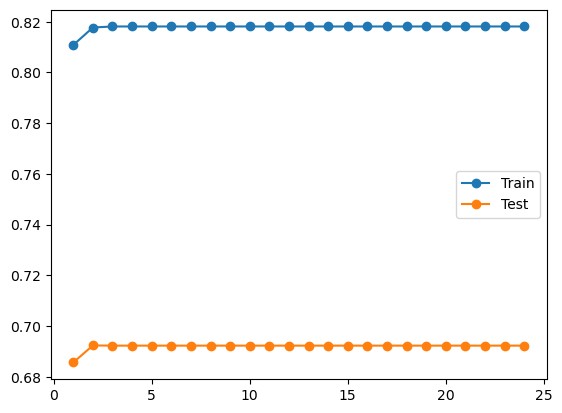

In [50]:
import xgboost as xg
values = [i for i in range(1,25)]
train_scores=[]
test_scores=[]
for i in values:
    test = xg.XGBRegressor(n_estimators = 50, max_depth = i, random_state = 84, 
                      booster = 'gbtree', learning_rate = 0.1
                     , reg_lambda = 45)
    test.fit(X_train, y_train)
    train_scores.append(test.score(X_train, y_train))
    test_scores.append(test.score(X_test,y_test))

# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

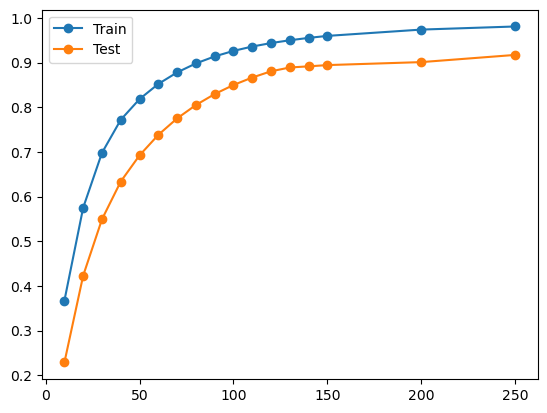

In [53]:
values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 200, 250]
train_scores=[]
test_scores=[]
for i in values:
    test = xg.XGBRegressor(n_estimators = i, max_depth = 3, random_state = 84, 
                      booster = 'gbtree', learning_rate = 0.1
                     , reg_lambda = 45)
    test.fit(X_train, y_train)
    train_scores.append(test.score(X_train, y_train))
    test_scores.append(test.score(X_test,y_test))

# plot of train and test scores vs n estimators
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

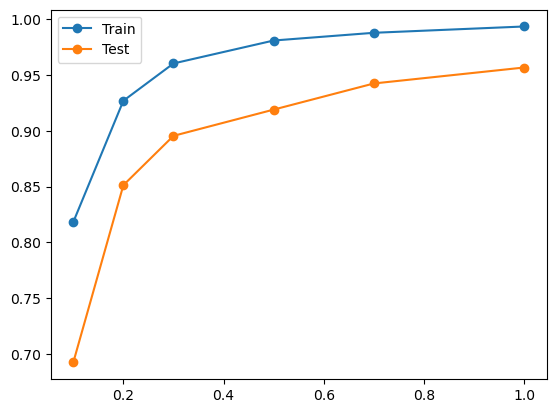

In [54]:
values = [0.1, 0.2, 0.3, 0.5, 0.7, 1.0]
train_scores=[]
test_scores=[]
for i in values:
    test = xg.XGBRegressor(n_estimators = 50, max_depth = 3, random_state = 84, 
                      booster = 'gbtree', learning_rate = i
                     , reg_lambda = 45)
    test.fit(X_train, y_train)
    train_scores.append(test.score(X_train, y_train))
    test_scores.append(test.score(X_test,y_test))

# plot of train and test scores vs learning rate
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [55]:
xgb = xg.XGBRegressor(n_estimators = 50, max_depth = 3, random_state = 84, 
                      booster = 'gbtree', learning_rate = 0.15
                     , reg_lambda = 45)


xgb.fit(X_train, y_train)
xgb_predictions = xgb.predict(X_test)
mean_squared_error(y_test, xgb_predictions)

1685.628656582698

two largest changes aside from the parameter adjustment & feature engineering are that we changed the booster to gbtree and adjusted the reg_lambda parameter. gblinear I found to be too similar to a Lasso Regression and was redundant when using a gradient boosting model. reg_lambda acts similar to Ridge, which finds features that don't increase accuracy and reduces our overfitting and test error.

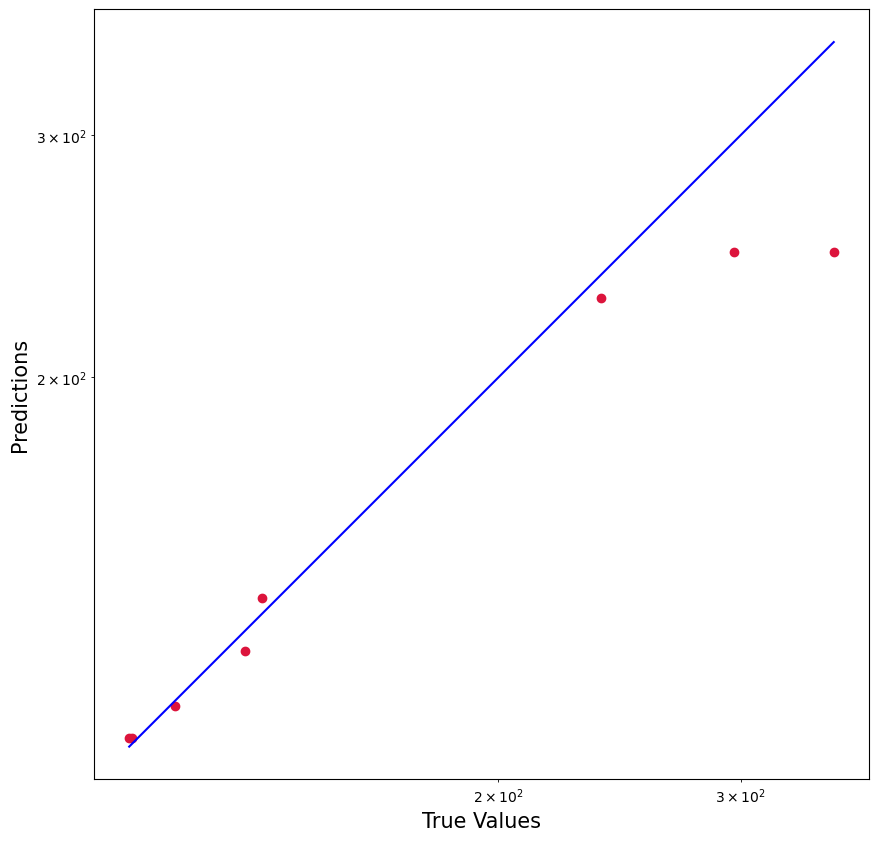

In [56]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, xgb_predictions, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(xgb_predictions), max(y_test))
p2 = min(min(xgb_predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

we can see here our predictions from the true values are not that off, but let's see if there is a better visualizer

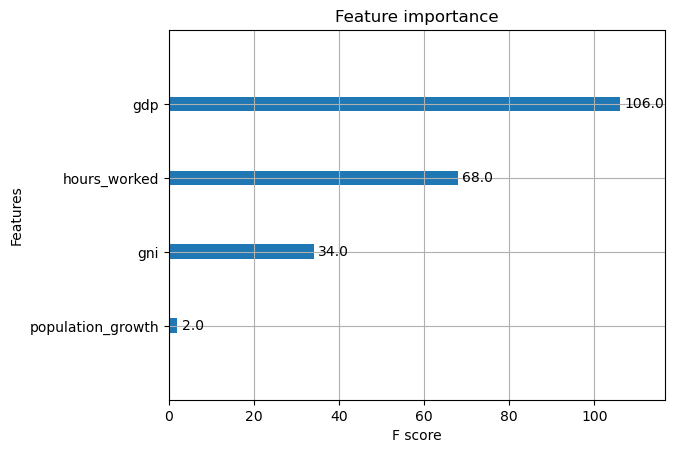

In [57]:
from xgboost import plot_importance
plot_importance(xgb)
pyplot.show()

as you can see many of the other features that had low impact were removed

In [58]:
print(xgb.score(X_train, y_train))
print(xgb.score(X_test, y_test))

0.8892501646709179
0.7917148886304644


a much more realistic score

In [76]:
X_train, X_test, y_train, y_test = train_test_split(bigdf, bigdf, test_size = .15,shuffle = False)

In [77]:
train = X_train
test = X_test

In [78]:
train = train.set_index('TIME')
test = test.set_index('TIME')

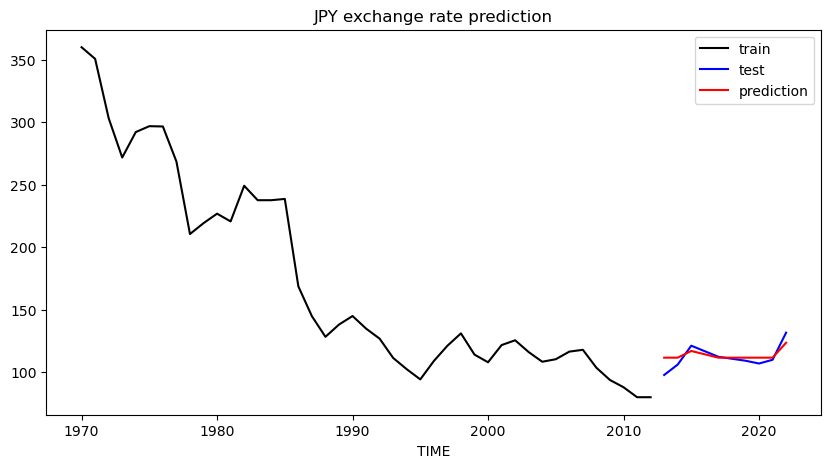

In [79]:
X_train = train.drop('exchange_rates', axis =1)
y_train = train['exchange_rates']

X_test = test.drop('exchange_rates', axis =1)
y_test = test['exchange_rates']

xgb.fit(X_train, y_train)
test['exchange_prediction'] = xgb.predict(X_test)

train['exchange_rates'].plot(style='k', figsize=(10,5), label = 'train')
test['exchange_rates'].plot(style='b', figsize=(10,5), label = 'test')
test['exchange_prediction'].plot(style='r', figsize=(10,5), label = 'prediction')
plt.title('JPY exchange rate prediction')
plt.legend()

After changing our xgboost tree parameters we were able to reduce the overfitting, removing some low-impact features, and increasing the number of data samples, we created a model with a much better prediction.

<Axes: >

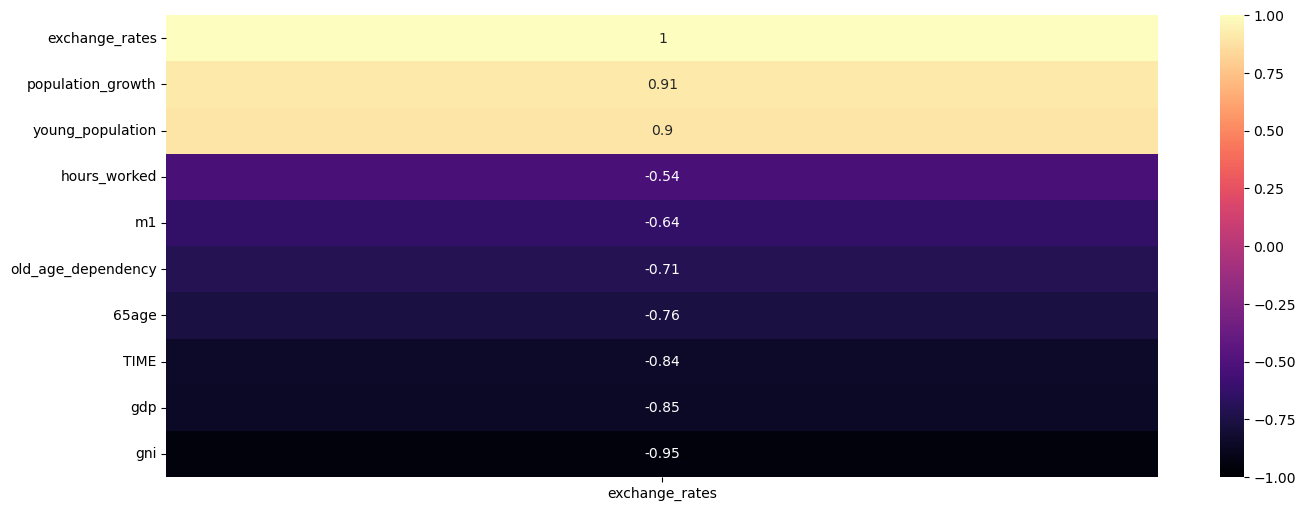

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
sns.heatmap(bigdf.corr()[['exchange_rates']].sort_values(by='exchange_rates',ascending=False),vmin=-1,vmax=1,annot=True,cmap='magma')

we can also see here our predictors have a much higher coorelation (negative or positive) to our target

In [90]:
#bigdf.to_csv('final_df.csv')